# Trabalho 01 - SME0829 - Aprendizado de Máquina

***

Grupo:
* Bryan Mariano Martinez Alves - 10224691
* Francisco de Miranda - 4402962
* Heitor Carvalho Pinheiro - 11833351
* Lucas Yuki Okuno - 11965992
* Victor Botelho Cardoso - 11953925


***

## Modelos de Regressão Linear

### Índice:

1. [Introdução](#1)
2. [Conjunto de Dados](#2)
3. [Análise](#3)
4. [Modelo de Machine Learning](#4)
5. [Validação](#5)
6. [Conclusão](#6)

## Introdução <a class= "anchor" id = 1></a>
Usamos o programa Python para estar analisando os dados, para usar os dados usamos o google colab. A escolha se deu pelos seguintes critérios: Fácil aprendizado; Simples de programar; Sintaxe intuitiva;Open Source; Modularização; Multiplataforma; Grande quantidade de bibliotecas disponíveis; Grande comunidade de usuários; Documentação extensa; Número de oportunidades no mercado de trabalho.

O conjunto de dados escolhido foi o palmerpenguins. Desejamos analisar a massa corporal dos pinguins.

In [134]:
!pip install palmerpenguins -q pycaret -q

In [135]:
import palmerpenguins

In [136]:
# import ML libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.ensemble as ske
import sklearn.linear_model as skl
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

## Conjunto de Dados <a class= "anchor" id = 2></a>

![Palmer Penguins](https://allisonhorst.github.io/palmerpenguins/reference/figures/lter_penguins.png)

Existem 344 observações de diferentes pinguins no nosso dataset.
Temos três variáveis categóricas (`Species`, `Island` e `Sex`) e cinco variáveis numéricas (`bill_length_mm`,	`bill_depth_mm`,
                	`flipper_length_mm`,	`body_mass_g`)

### Dicionário de Variáveis

* `Species`: Espécie do Pinguin (Adelie, Gentoo ou Chinstrap)
* `Island`: Ilha no Arquipelago de Palmer (Biscoe, Dream ou Torgersen)
* `bill_length_mm`: Comprimento do bico em mm
* `bill_depth_mm`: Profundidade do bico em mm
* `flipper_length_mm`: Comprimento da nadadeira em mm
* `body_mass_g`: Massa corporal em gramas
* `sex`: Sexo do pinguin (Male ou Female)

In [137]:
df = palmerpenguins.load_penguins()
df = df.drop(columns = 'year')

#reordering the columns
new_cols = ['island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex','species']

df = df.reindex(columns = new_cols)
df.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,male,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,female,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,female,Adelie
3,Torgersen,NaN,NaN,NaN,NaN,NaN,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,female,Adelie


## Análise <a class= "anchor" id = 3></a>

#### Limpeza dos dados

In [138]:
# find NA values
df.isnull().sum()

island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
species               0
dtype: int64

In [139]:
# remove rows with missing values
df = df.dropna()

#### Correlações 

<Figure size 864x432 with 0 Axes>

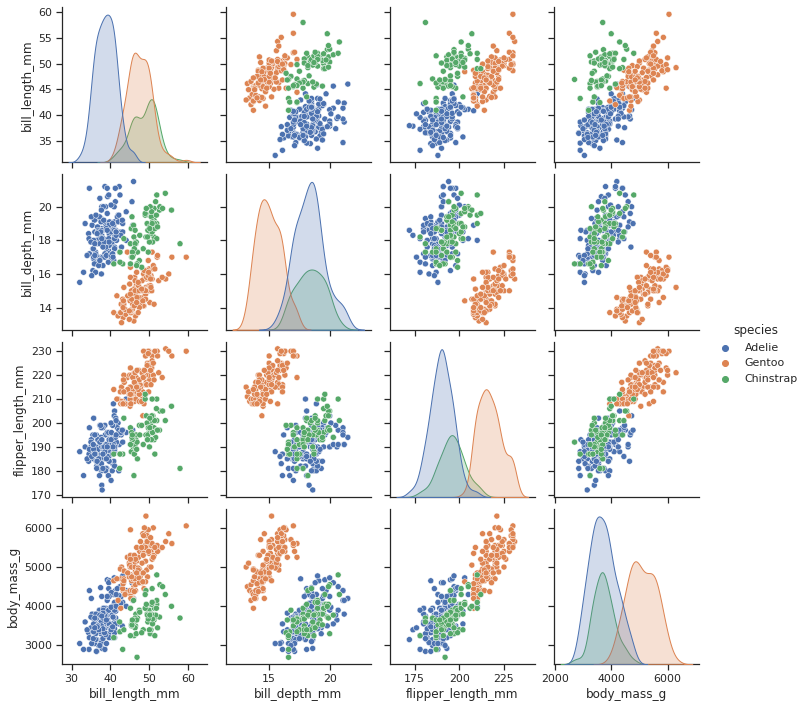

In [140]:
# scatter plots
plt.figure(figsize=(12,6))
sns.set_theme(style="ticks")

sns.pairplot(df, hue="species")
plt.show()


Algumas conclusões:

1. Pinguins Adelie têm o comprimento de bico menores.
2. Pinguins Adelie têm as menores nadadeiras.
3. Pinguins Gentoo têm, no geral, o peso e as nadadeiras maiores que as outras espécies



### Massa corporal dos pinguins

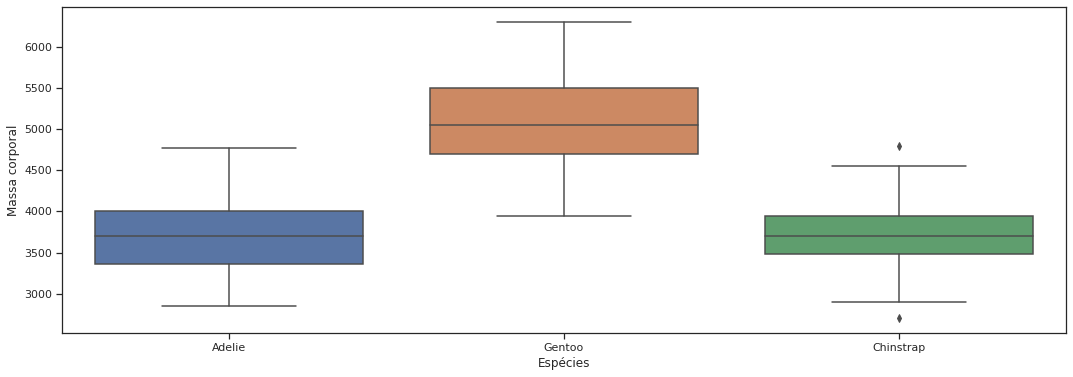

In [141]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'body_mass_g',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Massa corporal')
plt.show()

Portanto, as espécies Adelie e Chinstrap, possuem em média, massas corporais parecidas, 
por volta dos 3,7Kg. Enquanto que a espécie Gentoo, apresenta a maior massa corporal 
média em torno de 5Kg.

In [142]:
df.groupby(["species"])["body_mass_g"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,3706.164384,458.620135,2850.0,3362.5,3700.0,4000.0,4775.0
Chinstrap,68.0,3733.088235,384.335081,2700.0,3487.5,3700.0,3950.0,4800.0
Gentoo,119.0,5092.436975,501.476154,3950.0,4700.0,5050.0,5500.0,6300.0


#### Comprimento do Bico

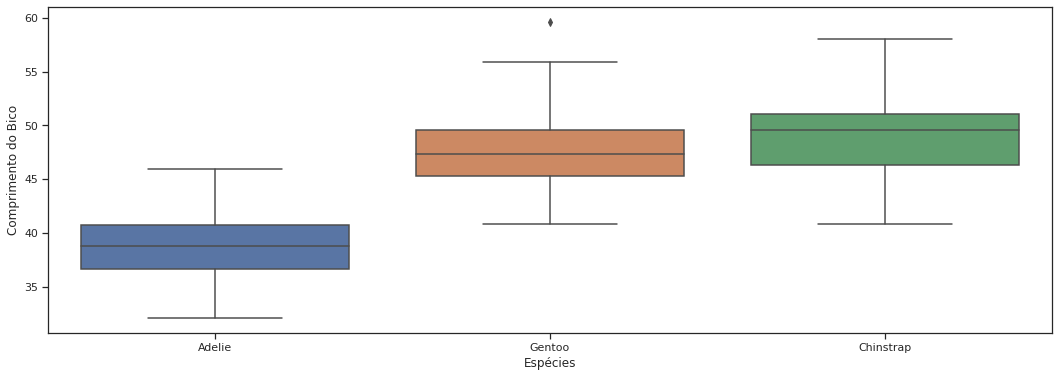

In [143]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'bill_length_mm',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Comprimento do Bico')
plt.show()

Os pinguins da espécie Adelie possuem comprimento do bico consideravelmente menor em 
relação às outras espécies. Já as espécies Gentoo e Chinstrap, possuem comprimento do 
bico bem próximo.

In [144]:
df.groupby(["species"])["bill_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,38.823973,2.662597,32.1,36.725,38.85,40.775,46.0
Chinstrap,68.0,48.833824,3.339256,40.9,46.350,49.55,51.075,58.0
Gentoo,119.0,47.568067,3.106116,40.9,45.350,47.40,49.600,59.6


Relação entre o Comprimento do Bico e a Massa Corporal


<Figure size 864x432 with 0 Axes>

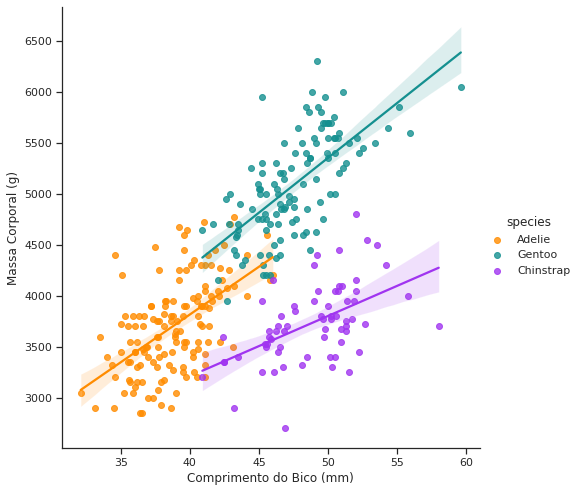

In [145]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="bill_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Comprimento do Bico (mm)')
g.set_ylabels('Massa Corporal (g)')

plt.show()

### Profundidade do bico

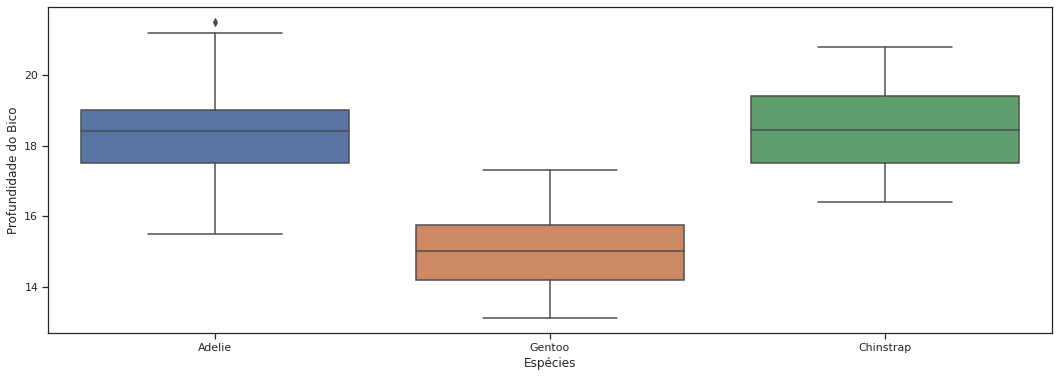

In [146]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'bill_depth_mm',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Profundidade do Bico')
plt.show()

Através desse boxplot, podemos observar que em média, os pinguins da espécie Gentoo 
possuem a menor profundidade de bico entre as três espécies. E para as espécies 
Adelie e Chinstrap, possuem profundidade do bico semelhantes.


In [147]:
df.groupby(["species"])["bill_depth_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,18.347260,1.219338,15.5,17.5,18.40,19.00,21.5
Chinstrap,68.0,18.420588,1.135395,16.4,17.5,18.45,19.40,20.8
Gentoo,119.0,14.996639,0.985998,13.1,14.2,15.00,15.75,17.3


Relação entre a profundidade do Bico e a Massa Corporal

<Figure size 864x432 with 0 Axes>

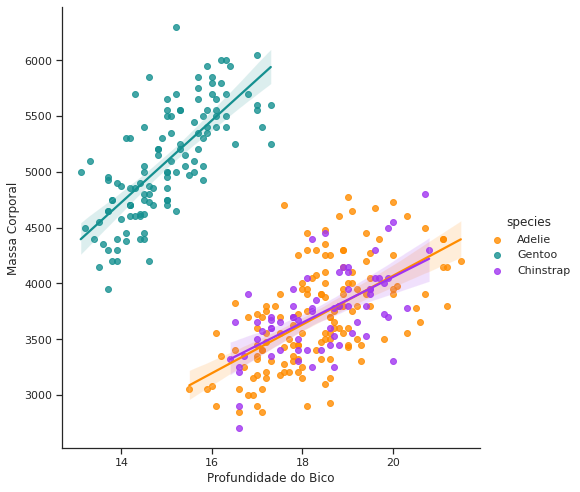

In [148]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="bill_depth_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Profundidade do Bico')
g.set_ylabels('Massa Corporal')

plt.show()

### Comprimento das Nadadeiras

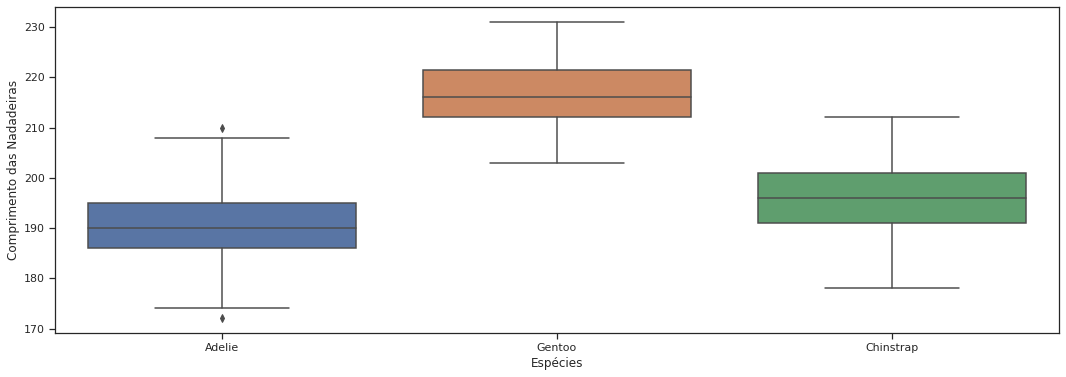

In [149]:
plt.figure(figsize=(18,6))

g = sns.boxplot(x='species',
                y = 'flipper_length_mm',
                data = df)

g.set_xlabel('Espécies')
g.set_ylabel('Comprimento das Nadadeiras')
plt.show()

Podemos observar que os pinguins da espécie Gentoo, possuem 
o maior comprimento das nadadeiras. Enquanto as espécies Adelie e Chinstrap 
tem menor comprimento de nadadeira mas semelhantes.

In [150]:
df.groupby(["species"])["flipper_length_mm"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Adelie,146.0,190.102740,6.521825,172.0,186.0,190.0,195.0,210.0
Chinstrap,68.0,195.823529,7.131894,178.0,191.0,196.0,201.0,212.0
Gentoo,119.0,217.235294,6.585431,203.0,212.0,216.0,221.5,231.0


Relação entre o comprimento da Nadadeira e a Massa Corporal

<Figure size 864x432 with 0 Axes>

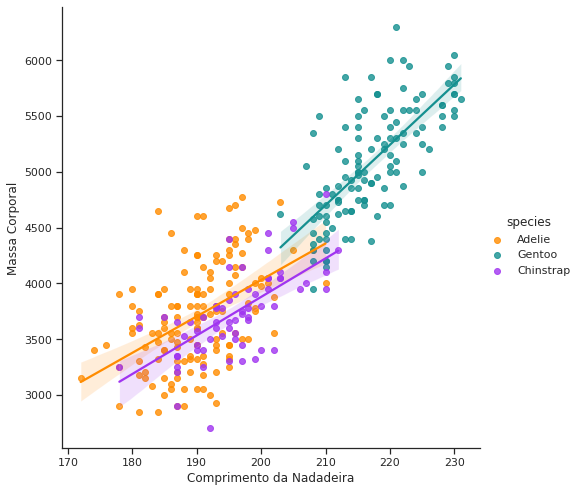

In [151]:
plt.figure(figsize=(12,6))

g = sns.lmplot(x="flipper_length_mm",
               y="body_mass_g",
               hue="species",
               height=7,
               data=df,
               palette=['#FF8C00','#159090','#A034F0'])
g.set_xlabels('Comprimento da Nadadeira')
g.set_ylabels('Massa Corporal')

plt.show()

### Análise por Sexo

<Figure size 864x432 with 0 Axes>

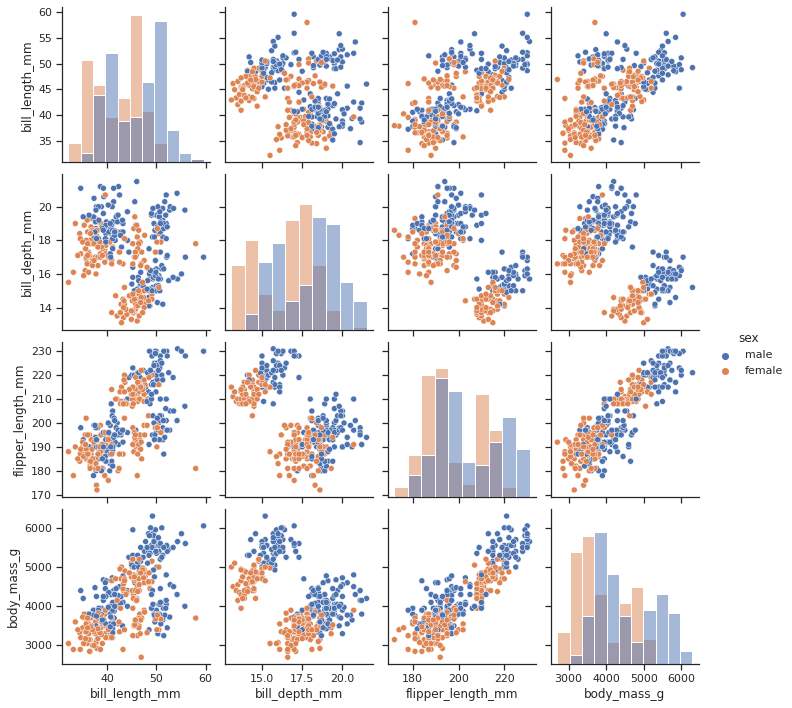

In [152]:
# Scatter plots
plt.figure(figsize=(12,6))
sns.set_theme(style="ticks")

sns.pairplot(df, hue="sex", diag_kind = "hist",
             x_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"],
             y_vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
plt.show()


#### Distribuição dos Sexos por Ilha

In [153]:
df.groupby(["island"])["sex"].value_counts()

island     sex   
Biscoe     male      83
           female    80
Dream      male      62
           female    61
Torgersen  female    24
           male      23
Name: sex, dtype: int64

A distribuição dos sexos dos pinguins por ilha, é uma divisão quase "meio a meio"

In [154]:
df.groupby(["sex"])[["body_mass_g", "bill_length_mm", "bill_depth_mm", "flipper_length_mm"]].mean()

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm
sex,,,,
female,3862.272727,42.096970,16.425455,197.363636
male,4545.684524,45.854762,17.891071,204.505952


Verificamos que os pinguins machos têm o peso médio consideravelmente maior que as fêmeas e suas nadadeiras também são maiores. O gênero não interfere tanto no tamanho e profundidade do bico.


### Classificação das características dos pinguins por Espécie

1. **Massa Corporal**: 

  * Machos mais pesados que fêmeas. Gentoo mais pesado que as outras duas espécies.

2. **Comprimento do Bico**:

  * Chinstrap e Gentoo apresentam média de comprimento semelhante e superior a Adelie

3. **Profundidade do Bico**
  *  Adelie e Chinstrap apresentam profundidade de bicos semelhantes e superior ao Gentoo
4. **Comprimento das Nadadeiras**
  * A média do comprimento das nadadeiras, em ordem crescente: Adelia, Chinstrap e Gentoo. 

## Modelo de ML <a class= "anchor" id = 4></a>

Neste exemplo, ao invés de tentarmos predizer uma variável quantitativa - **a massa corporal** dos pinguins, iremos tentar **predizer a espécie do pinguin**, com base em suas características físicas.

Deste modo, utilizaremos Métodos não paramétricos de classificação.

In [155]:
#looking for any null values
print(df.isnull().sum())
print()
#percentage of null-values
print(f"Percentage of null values for each feature\n")

null_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

for i in null_columns:
  print(f"Frequency of null values: {i}")
  print(df[i].isnull().value_counts(normalize=True))
  print()

#excluindo as linhas com valores nulos do df
df = df.dropna(axis=0, how='any')

island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
species              0
dtype: int64

Percentage of null values for each feature

Frequency of null values: bill_length_mm
False    1.0
Name: bill_length_mm, dtype: float64

Frequency of null values: bill_depth_mm
False    1.0
Name: bill_depth_mm, dtype: float64

Frequency of null values: flipper_length_mm
False    1.0
Name: flipper_length_mm, dtype: float64

Frequency of null values: body_mass_g
False    1.0
Name: body_mass_g, dtype: float64

Frequency of null values: sex
False    1.0
Name: sex, dtype: float64



Discretizando as features categoricas utilizando um LabelEncoder


In [156]:
# encoding categorical features

le = LabelEncoder()

df['species_encoded'] = le.fit_transform(df['species'])
df['sex_encoded'] = le.fit_transform(df['sex'])
df['island_encoded'] = le.fit_transform(df['island'])

Modelos não-paramétricos para tentar predizer a  `Espécie` dos pinguins baseado nas outras variáveis numéricas.

Portanto nossa Label é `species`


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


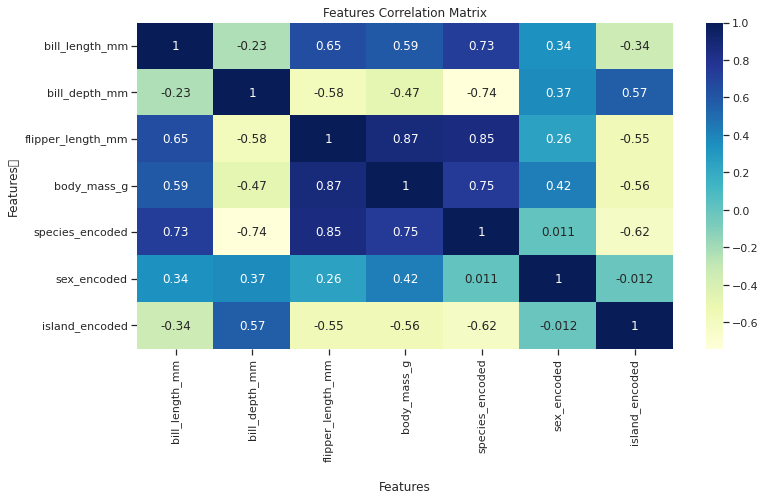

In [157]:
#Correlograma (mapa de calor) para realizar a feature selection
plt.figure(figsize=(12,6))

cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'species_encoded', 'sex_encoded',
       'island_encoded']

corr = df[cols].corr()

hm = sns.heatmap(corr, annot=True, cmap='YlGnBu')
hm.set(xlabel='\nFeatures', ylabel = 'Features\t', title = 'Features Correlation Matrix')

plt.show()

Percebemos que a correlação entre a espécie e a maioria das features é acima de 60%. Exceto, a variável `sexo` que apresenta correlação de 0.011

Separando o conjunto de teste e treinamento, realizando um *hold-out* de 30%. Ou seja, separamos 30% dos nossos dados para teste.

In [158]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_encoded',
       'island_encoded']

X = df[features]
y = df['species_encoded']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Padronizando as variaveis numéricas

In [172]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [174]:
type(X_train)

numpy.ndarray

Implementando os modelos de **Random Forest** e **KNN (K Nearest Neighbours)**

In [160]:
# criando um objeto de classificacao no sklearn
knn_model = KNeighborsClassifier(metric='euclidean', n_neighbors=5)

In [161]:
# fitting the KNN Model
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [162]:
y_prediction = knn_model.predict(X_test)

In [163]:
y_test

185    2
182    2
340    1
52     0
299    1
      ..
215    2
62     0
140    0
28     0
229    2
Name: species_encoded, Length: 67, dtype: int64

In [164]:
# report = pd.DataFrame()
# report['Actual Values'] = y_test
# report['KNN Predicted Values'] = y_prediction

print(f"KNN Accuracy: {accuracy_score(y_prediction, y_test)}\n")
print(classification_report(y_test, y_prediction))

KNN Accuracy: 0.9850746268656716

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00        25

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67



#### Plotando a região de decisão do KNN

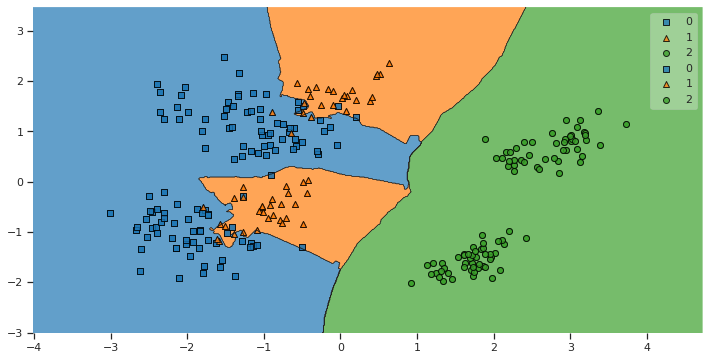

In [178]:
from sklearn.decomposition import PCA

plt.figure(figsize=(12,6))

pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
knn_model.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.values, clf=knn_model, legend=2)

plot_decision_regions(X_train2, y_train.values, knn_model)
plt.show()

In [ ]:
# é região de decisão que vcs querem?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.linear_model as lm
import sklearn.ensemble as ens
import mlxtend as ml
import sklearn.neural_network as nn
from mlxtend.classifier import EnsembleVoteClassifier
import matplotlib.gridspec as gridspec
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB as gnb
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
import itertools
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.plotting import plot_decision_regions

In [ ]:
clf1 = lm.LogisticRegression(solver = 'sag')
clf2 = ens.RandomForestClassifier()
clf3 = ens.GradientBoostingClassifier()
clf4 = ens.AdaBoostClassifier()
clf5 = ens.BaggingClassifier()
clf6 = ens.ExtraTreesClassifier()
clf7 = sk.svm.SVC()
clf8 = sk.neighbors.KNeighborsClassifier()
clf9 = nn.MLPClassifier()
# decision tree
clf10 = sk.tree.DecisionTreeClassifier()
# xdgboost
clf11 = xgb.XGBClassifier()
# naive bayes
clf12 = gnb()
# lda
clf13 = LDA()
# qda
clf14 = QDA()
# SHAP
clf15 = ens.ExtraTreesClassifier()

eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf11, clf12, clf13, clf14, clf15], voting='hard')


In [ ]:
# Plotting decision regions

gs = gridspec.GridSpec(4, 4)
fig = plt.figure(figsize=(15,15))

labels = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'Bagging',
 'Extra Trees', 'SVM', 'KNN', 'Neural Network', 'Decision Tree', 'XGBoost', 'Naive Bayes', 'LDA', 'QDA', 'SHAP', 'Votes']


for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, clf11, clf12, clf13, clf14, clf15, eclf], labels,
                         itertools.product([0, 1, 2, 3],
                         repeat=2)):

    clf.fit(X_train2, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(  X_train2, y_train.values, clf=clf, legend=2)
    plt.title(lab)

plt.show()

## Daqui para baixo sao partes do trabalho antigo

## Validação <a class= "anchor" id = 5></a>

In [ ]:
# summary of linear regression models
print('Linear Regression Scores for TEST sample')
print('LR: ', lr.score(X_test, y_test))
print('Lasso: ', lr_lasso.score(X_test, y_test))
print('Ridge: ', lr_ridge.score(X_test, y_test))
print('Elastic: ', lr_elastic.score(X_test, y_test))


### Validação cruzada

Vamos ajustar o modelo selecionado com o auxílio da biblioteca `oycaret`, que fará um 10-fold cross validation e uma seleção de hiperparâmetros

In [ ]:
from pycaret.regression import *

setup(data = df_dummies, target = 'body_mass_g',silent=True)

In [ ]:
ridge_best = create_model('ridge')
tuned_rig = tune_model(ridge_best)
fin_rig = finalize_model(tuned_rig)

Pudemos ver que o modelo ajustado com a validação cruzada a tunagem dos hiperparâmetros apresentou o mesmo score de $R^2$ obtido anteriormente. Vamos agora verificar se as suposições do modelo linear estão sendo satisfeitas através dos plots residuais.

### Plot dos resíduos

In [ ]:
plot_model(fin_rig, 'residuals')

Podemos ver que aparentemente a suposição de aleatoriedade dos resíduos em torno do zero foi satisfeita. Podemos também avaliar tal suposição com os plots abaixo:

In [ ]:
plot_model(fin_rig, 'residuals_interactive')

Temos apenas três pontos com alta influência no modelo, que consideramos não ser necessário remover da análise. O QQPlot também ficou razoavelmente próximo da linha dos quantis teóricos, ratificando as conclusões já feitas. Nenhum ponto apresentou resíduo studentizado com influência além do threshold estabelecido. 

### Erro na predição

In [ ]:
plot_model(fin_rig, 'error')

Novamente, não notamos nenhum padrão no plot de erros de previsão, não apresentando evidências para discordarmos da aleatoriedade dois resíduos.

### Pontos influentes (distância de cooks)

In [ ]:
plot_model(fin_rig, 'cooks')

### Importância dos atributos

In [ ]:
plot_model(fin_rig, 'feature')

### Curva de aprendizado para cada fold

In [ ]:
plot_model(fin_rig, 'learning')

Esse plot nos mostra o score de $R^2$ obtido em cada fold do conjunto de treinamento e na validação cruzada. Observamos que um aumento de instâncias no conjunto de treino favoreceu a convergência do nosso coeficiente de determinação.

### Agrupamento por T-SNE

In [ ]:
plot_model(fin_rig, 'manifold')

O T-SNE realiza uma redução de dimensionalidade dos dez atributos que usamos em nosso modelo e apresenta o agrupamento realizado pelo ajuste nas regiões de decisão escolhidas. Podemos ver que aparentemente houve uma boa separação das classes pelo modelo.

### Interpretação do modelo

Vamos olhar para os coeficientes obtidos pelo modelo adotado. O intercepto indica o peso médio padronizado esperado de pinguins da ilha de Biscoe, da espécie Gentoo e do sexo Masculino. 

In [ ]:
#intercept of lr_ridge
lr_ridge.intercept_

In [ ]:
coefs[2:3]

Cada coluna indica o aumento médio esperado para aquele preditor. Sumarizando, temos que um aumento no tamanho no bico ou nas nadadeiras favorece para um maior peso médio, enquanto pinguins que não sejam da espécie Gentoo, da ilha de Biscoe, ou do sexo masculino apresentam peso médio esperado menor.

## Conclusão <a class= "anchor" id = 6></a>

Podemos concluir que o modelo de regressão linear foi o modelo com o melhor desempenho segundo o critério de $R^2$, na tentativa de prever a massa corporal dos pinguins, considerando as outras variáveis presentes nos dados e utilizando como métrica o *Coeficiente de Determinação R2*, responsável por medir quanto da variablidade dos dados pode ser explicada pelo modelo.

Desse modo, o modelo de regressão linear foi capaz de explicar cerca de 89% da variablidade do modelo, quando o objetivo era prever a massa corporal dos pinguins.

O modelo de regularização Ridge, também apresentou um resultado quase que idêntico ao da regressão linear, que seria o modelo escolhido se o critério adotado fosse o de menor erro quadrático.